In [0]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=87314548f9fc36284b7b345aab09d8e33ce409c6cad06afd570a1332092cf808
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
# ------------------------------------------------------------
# Northwestern University 
# MSDS 422
# W5 Principal Components Analysis
 # -------------------------------------------------------------
# S1 Run SetUp Script to Install Packages 
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import matplotlib.cbook as cbook
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import os # Operation System
import mglearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error, r2_score  
from sklearn.naive_bayes import BernoulliNB
from sklearn import linear_model
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, cross_val_score, cross_val_predict
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from math import sqrt  # for root mean-squared error calculation
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import sklearn
import plotly
import plotly.graph_objs as go
import time
from sklearn.datasets import make_classification
from collections import OrderedDict
from plotly import tools
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn import metrics
import cProfile

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [0]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#S3 Establish working directory
os.getcwd()
%cd /content/gdrive/My Drive/422/Week5
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = " /content/gdrive/My Drive/422/Week5/working/"

[Errno 2] No such file or directory: '/content/gdrive/My Drive/422/Week5'
/content
/content
cache  sample_data
Working Directory
/content


In [0]:
# Fetch the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
train.shape

(42000, 785)

In [0]:
#Get training and target data split 
X_train_kgl_orig = train.drop('label', axis=1) 
y_train_kgl_orig = train['label']
print("Features Dataset:", X_train_kgl_orig.shape)
print("Labels: " ,y_train_kgl_orig.shape)

Features Dataset: (42000, 784)
Labels:  (42000,)


### Visualizations



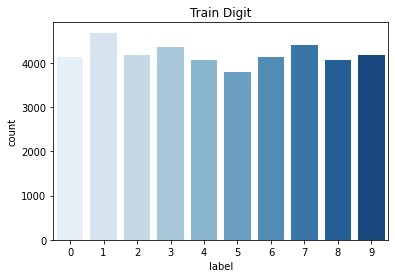

In [0]:
mn_plt_trn =sns.countplot(y_train_kgl_orig, palette="Blues").set_title('Train Digit')
fig2 = mn_plt_trn.get_figure()
#fig2.show()
fig2.savefig('TrainDistMNIST.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)

# Plot a few Images



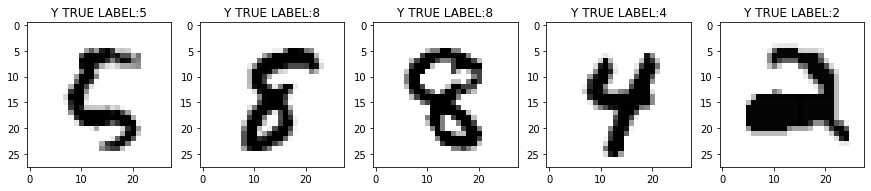

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,5, figsize=(15, 3), sharey=False)
for i in range(5):
  axg   = ax[i]
  some_digit = X[i+2000]
  some_digit_image = some_digit.reshape(28, 28)
  
  axg.imshow(some_digit_image, cmap = matplotlib.cm.binary,
  interpolation="nearest")
  plt.axis("on")

  plt.title("Y TRUE LABEL:"+ str(y[i+2000]))
  
  

  axg.set_title("Y TRUE LABEL:"+ str(y[i+2000]))

plt.savefig('MNIST_sample.png')
  # plt.close()
  # plt.savefig(str(y[i+2000]) + str(i)+'.png')

# Start with model exlporation

In [0]:
#train test split for grid search
X_train, X_test, y_train, y_test = train_test_split(X_train_kgl_orig, y_train_kgl_orig, train_size = 0.7,
                                                    test_size =0.3, random_state=1)

# Grid Search


In [0]:
# Grid Seerch: Abosolutely critical
params = {'n_estimators': [20, 50, 100],'max_features': ['auto','sqrt'] ,'max_depth':[4,5,7,None] }

 
rfc_gs = GridSearchCV(RandomForestClassifier(), params, cv=10, scoring="accuracy", return_train_score=True)
rfc_gs.fit(X_train , y_train )
print("Test set score: {:.2f}".format(rfc_gs.score(X_test , y_test )))
print("Best parameters: {}".format(rfc_gs.best_params_))
print("Best cross-validation score: {:.2f}".format(rfc_gs.best_score_))
print("Best estimator:\n{}".format(rfc_gs.best_estimator_))

Test set score: 0.96
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation score: 0.96
Best estimator:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


# Train Non PCA classifier


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train_kgl_orig, y_train_kgl_orig, train_size = 0.7,
                                                    test_size =0.3, random_state=1)
 
start_time = time.process_time() 

rfc = RandomForestClassifier(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score=True, bootstrap = True, random_state=1)
# Train
rfc = rfc.fit(X_train , y_train )

print("Accuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)))
f1_train = f1_score(y_train, rfc.predict(X_train),average='weighted')
f1_tst = f1_score(y_test, rfc.predict(X_test),average='weighted')

# print("f1_train: {:}".format(f1))
# print("f1_tst: {:}".format(f1_tst))
    
# Extract single tree
print(metrics.classification_report(rfc.predict(X_train), y_train))
print(metrics.classification_report(rfc.predict(X_test), y_test))
end_time = time.process_time() 
runtime = end_time - start_time  # seconds of wall-clock time
print(runtime)  # report in milliseconds

Accuracy on training set: 1.000
Accuracy on test set: 0.964
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2885
           1       1.00      1.00      1.00      3288
           2       1.00      1.00      1.00      2920
           3       1.00      1.00      1.00      3030
           4       1.00      1.00      1.00      2840
           5       1.00      1.00      1.00      2684
           6       1.00      1.00      1.00      2879
           7       1.00      1.00      1.00      3116
           8       1.00      1.00      1.00      2814
           9       1.00      1.00      1.00      2943

    accuracy                           1.00     29399
   macro avg       1.00      1.00      1.00     29399
weighted avg       1.00      1.00      1.00     29399

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1263
           1       0.99      0.99      0.99      1395
           2      

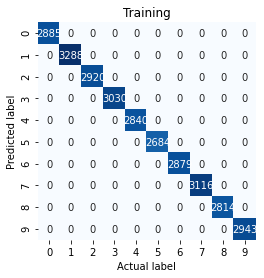

In [0]:
#Confusion Matrix iRFC
cm_trn = confusion_matrix(y_train, rfc.predict(X_train))
cm_trn_plt=sns.heatmap(cm_trn.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Training");
fig1 = cm_trn_plt.get_figure()
fig1.show()
fig1.savefig('TrainCM.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)

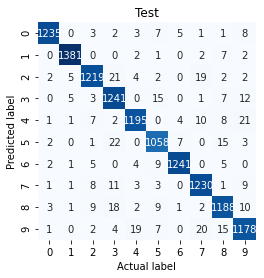

In [0]:
c_mat = confusion_matrix(y_test, rfc.predict(X_test))
cm_plt=sns.heatmap(c_mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Test");
fig2 = cm_plt.get_figure()
#fig2.show()
fig2.savefig('TestCM.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)

# PCA

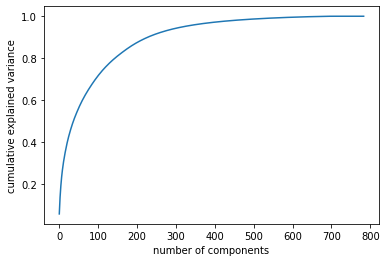

In [0]:
#S8 Estimate number PCA components
X_std = StandardScaler().fit_transform(X_train_kgl_orig)
pca = PCA().fit(X_std)
pca_plt=plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.savefig('PCAEstimate.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25 )

# Scale PCA

In [0]:
#S11 Split Train and Test
start_time = time.process_time() 
X_std = StandardScaler().fit_transform(X_train_kgl_orig)
pca = PCA(0.95)
pca.fit(X_std)
 
X_pca = pca.transform(X_std)

X_pca = X_pca.astype(int)

print("Original shape: {}".format(str(X_train_kgl_orig.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
print("Componenets: ", pca.n_components_)
X_pca_trn, X_pca_tst, y_pca_trn, y_pca_tst = train_test_split(X_pca, y_train_kgl_orig, train_size = 0.7,
                                                    test_size =0.3, random_state=1)

end_time = time.process_time()  
runtime = end_time - start_time  # seconds of wall-clock time
print(runtime)

Original shape: (42000, 784)
Reduced shape: (42000, 320)
Componenets:  320
17.551848466000024


In [0]:
 #S12 RF PCA Model
start_time = time.process_time() 
rfc_pca = RandomForestClassifier(n_estimators=100,max_features='sqrt', n_jobs=-1, oob_score=True,  bootstrap = True, random_state=1)

# Train
rfc_pca= rfc_pca.fit(X_pca_trn, y_pca_trn)
print("Accuracy on training set: {:.3f}".format(rfc_pca.score(X_pca_trn, y_pca_trn)))
print("Accuracy on test set: {:.3f}".format(rfc_pca.score(X_pca_tst, y_pca_tst)))
f1_train = f1_score(y_pca_trn, rfc_pca.predict(X_pca_trn),average='weighted')
f1_tst = f1_score(y_pca_tst, rfc_pca.predict(X_pca_tst),average='weighted')
 
# print("f1_train: {:}".format(f1_train))
# print("f1_tst: {:}".format(f1_tst))
     
 
print(metrics.classification_report(rfc_pca.predict(X_pca_trn), y_pca_trn))
print(metrics.classification_report(rfc_pca.predict(X_pca_tst), y_pca_tst))

end_time = time.process_time()  
runtime = end_time - start_time  # seconds of wall-clock time
print(runtime)  # report in milliseconds

Accuracy on training set: 1.000
Accuracy on test set: 0.933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2885
           1       1.00      1.00      1.00      3288
           2       1.00      1.00      1.00      2920
           3       1.00      1.00      1.00      3030
           4       1.00      1.00      1.00      2840
           5       1.00      1.00      1.00      2684
           6       1.00      1.00      1.00      2879
           7       1.00      1.00      1.00      3116
           8       1.00      1.00      1.00      2814
           9       1.00      1.00      1.00      2943

    accuracy                           1.00     29399
   macro avg       1.00      1.00      1.00     29399
weighted avg       1.00      1.00      1.00     29399

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1277
           1       0.98      0.98      0.98      1395
           2      

# Non Scaled PCA

In [0]:
start_time = time.process_time() 
pca = PCA(0.95)
pca.fit(X_train_kgl_orig)
X_pca = pca.transform(X_train_kgl_orig)
print(pca.n_components_)
X_pca = X_pca.astype(int)

print("Original shape: {}".format(str(X_train_kgl_orig.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
print("Componenets: ", pca.n_components_)
X_pca_trn, X_pca_tst, y_pca_trn, y_pca_tst = train_test_split(X_pca, y_train_kgl_orig, train_size = 0.7,
                                                    test_size =0.3, random_state=1)
end_time = time.process_time()  
runtime = end_time - start_time  # seconds of wall-clock time
print(runtime)

154
Original shape: (42000, 784)
Reduced shape: (42000, 154)
Componenets:  154
16.359609242000033


In [0]:
 
start_time = time.process_time() 
rfc_pca = RandomForestClassifier(n_estimators=100,max_features='sqrt', n_jobs=-1, oob_score=True,  bootstrap = True, random_state=1)

# Train
rfc_pca= rfc_pca.fit(X_pca_trn, y_pca_trn)
print("Accuracy on training set: {:.3f}".format(rfc_pca.score(X_pca_trn, y_pca_trn)))
print("Accuracy on test set: {:.3f}".format(rfc_pca.score(X_pca_tst, y_pca_tst)))
f1_train = f1_score(y_pca_trn, rfc_pca.predict(X_pca_trn),average='weighted')
f1_tst = f1_score(y_pca_tst, rfc_pca.predict(X_pca_tst),average='weighted')
 
# print("f1_train: {:}".format(f1_train))
# print("f1_tst: {:}".format(f1_tst))
     
 
print(metrics.classification_report(rfc_pca.predict(X_pca_trn), y_pca_trn))
print(metrics.classification_report(rfc_pca.predict(X_pca_tst), y_pca_tst))

end_time = time.process_time()  
runtime = end_time - start_time  # seconds of wall-clock time
print(runtime)  # report in milliseconds

Accuracy on training set: 1.000
Accuracy on test set: 0.941
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2885
           1       1.00      1.00      1.00      3288
           2       1.00      1.00      1.00      2920
           3       1.00      1.00      1.00      3030
           4       1.00      1.00      1.00      2840
           5       1.00      1.00      1.00      2684
           6       1.00      1.00      1.00      2879
           7       1.00      1.00      1.00      3116
           8       1.00      1.00      1.00      2814
           9       1.00      1.00      1.00      2943

    accuracy                           1.00     29399
   macro avg       1.00      1.00      1.00     29399
weighted avg       1.00      1.00      1.00     29399

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1267
           1       0.98      0.98      0.98      1394
           2      

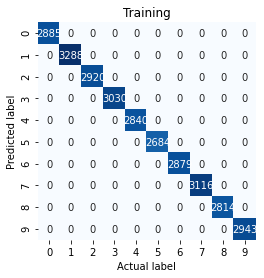

In [0]:
#Confusion Matrix RFC-PCA
cm_trn_pca = confusion_matrix(y_pca_trn, rfc_pca.predict(X_pca_trn))
cm_trn_pca_plt=sns.heatmap(cm_trn_pca.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Training");
fig4 = cm_trn_pca_plt.get_figure()
fig4.show()
fig4.savefig('TrainPCACM.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)

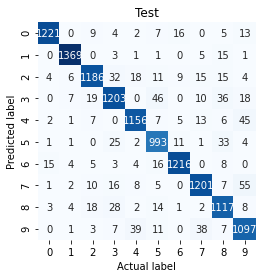

In [0]:
c_tst_pca = confusion_matrix(y_pca_tst, rfc_pca.predict(X_pca_tst))
c_tst_pca_plt=sns.heatmap(c_tst_pca.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.title("Test");
fig5 = c_tst_pca_plt.get_figure()
fig5.show()
fig5.savefig('TestPCACM.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25)

## Kaggle test score using the whole train test

In [0]:
 
start = time.process_time()
rfc_nopca = RandomForestClassifier(n_estimators=100,max_features='sqrt', n_jobs=-1, oob_score=True,  bootstrap = True, random_state=1)
rfc_nopca= rfc_nopca.fit(X_train_kgl_orig    , y_train_kgl_orig )
end = time.process_time()
runtime = end-start
print(runtime)
predict_nopca = rfc_nopca.predict(test)
predict_nopca

#### PCA


In [0]:
X_std = StandardScaler().fit_transform(X_train_kgl_orig)
pca = PCA(0.95)
pca.fit(X_std)
X_pca = pca.transform(X_std)
print(pca.n_components_)
X_pca = X_pca.astype(int)
 

320


In [0]:
scaler = StandardScaler() 
s_scaler = scaler.fit(X_train_kgl_orig)
X_train_std = s_scaler.transform (X_train_kgl_orig)
X_test_std = s_scaler.transform (test)
X_train_pca = pca.transform(X_train_std)
print(pca.n_components_)
X_test_pca = pca.transform(X_test_std)
X_train_pca = X_train_pca.astype(int)
X_test_pca = X_test_pca.astype(int)
print(X_train_pca.shape)
print(X_test_pca.shape)

320
(42000, 320)
(28000, 320)


In [0]:
start = time.process_time()  
rfc_pca = RandomForestClassifier(n_estimators=100,max_features='sqrt', n_jobs=-1, oob_score=True,  bootstrap = True, random_state=1)
rfc_pca= rfc_pca.fit(X_train_pca   , y_train_kgl_orig )
end = time.process_time()
runtime = end-start
print(runtime)
predict_pca = rfc_pca.predict(X_test_pca)
predict_pca

28.48555953099958


array([2, 0, 9, ..., 3, 9, 2])

# Save Test dataset


In [0]:
pca_test =pd.DataFrame(predict_pca,columns=['label']  )
pca_test.index.name = 'ImageId'
pca_test.index = range(1,len(pca_test)+1)
print(pca_test)
pca_test.to_csv("pd_pca.csv") 

       label
1          2
2          0
3          9
4          4
5          3
...      ...
27996      9
27997      7
27998      3
27999      9
28000      2

[28000 rows x 1 columns]


In [0]:
nopca_test =pd.DataFrame(predict_nopca,columns=['label']  )
nopca_test.index.name = 'ImageId'
nopca_test.index = range(1,len(nopca_test)+1)
print(nopca_test)
nopca_test.to_csv("pd_nopca.csv") 

       label
1          2
2          0
3          9
4          9
5          3
...      ...
27996      9
27997      7
27998      3
27999      9
28000      2

[28000 rows x 1 columns]


In [0]:
pca_test =pd.DataFrame(predict_pca,columns=['pca'])
no_pca_test = pd.DataFrame(predict_nopca, columns=['nopca'])
pca_test['nopca'] = no_pca_test['nopca']
pca_test.to_csv("combined.csv") 